In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('car_data.csv')
data

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [3]:
data.drop_duplicates()
data.shape

(11914, 16)

In [4]:
data.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [5]:
gd = data.groupby('city mpg')['Engine Cylinders'].transform('median')
data['Engine Cylinders'].fillna( value=gd, inplace=True )

data['Engine Cylinders'].isnull().sum()

0

In [6]:
gd = data.groupby('Engine Cylinders')['Engine HP'].transform('median')
data['Engine HP'].fillna( value=gd, inplace=True )

data['Engine HP'].isnull().sum()

0

In [7]:
gd = data.groupby('Vehicle Size')['Number of Doors'].transform(lambda x: x.mode().iloc[0])
data['Number of Doors'].fillna( value=gd, inplace=True )

data['Number of Doors'].isnull().sum()

0

In [8]:
data['Engine Fuel Type'].fillna( data['Engine Fuel Type'].mode().iloc[0], inplace=True )

data['Engine Fuel Type'].isnull().sum()

0

In [9]:
gd = data.groupby('Make')['Market Category'].transform( lambda x: x.mode().iloc[0] )
data['Market Category'].fillna( value=gd, inplace=True)

data['Market Category'].isnull().sum()

0

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11914 non-null  object 
 4   Engine HP          11914 non-null  float64
 5   Engine Cylinders   11914 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11914 non-null  float64
 9   Market Category    11914 non-null  object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [11]:
features = data.select_dtypes(include=['int64','float64']).columns
features = features.drop(['Year','Number of Doors']).to_list()
features

['Engine HP',
 'Engine Cylinders',
 'highway MPG',
 'city mpg',
 'Popularity',
 'MSRP']

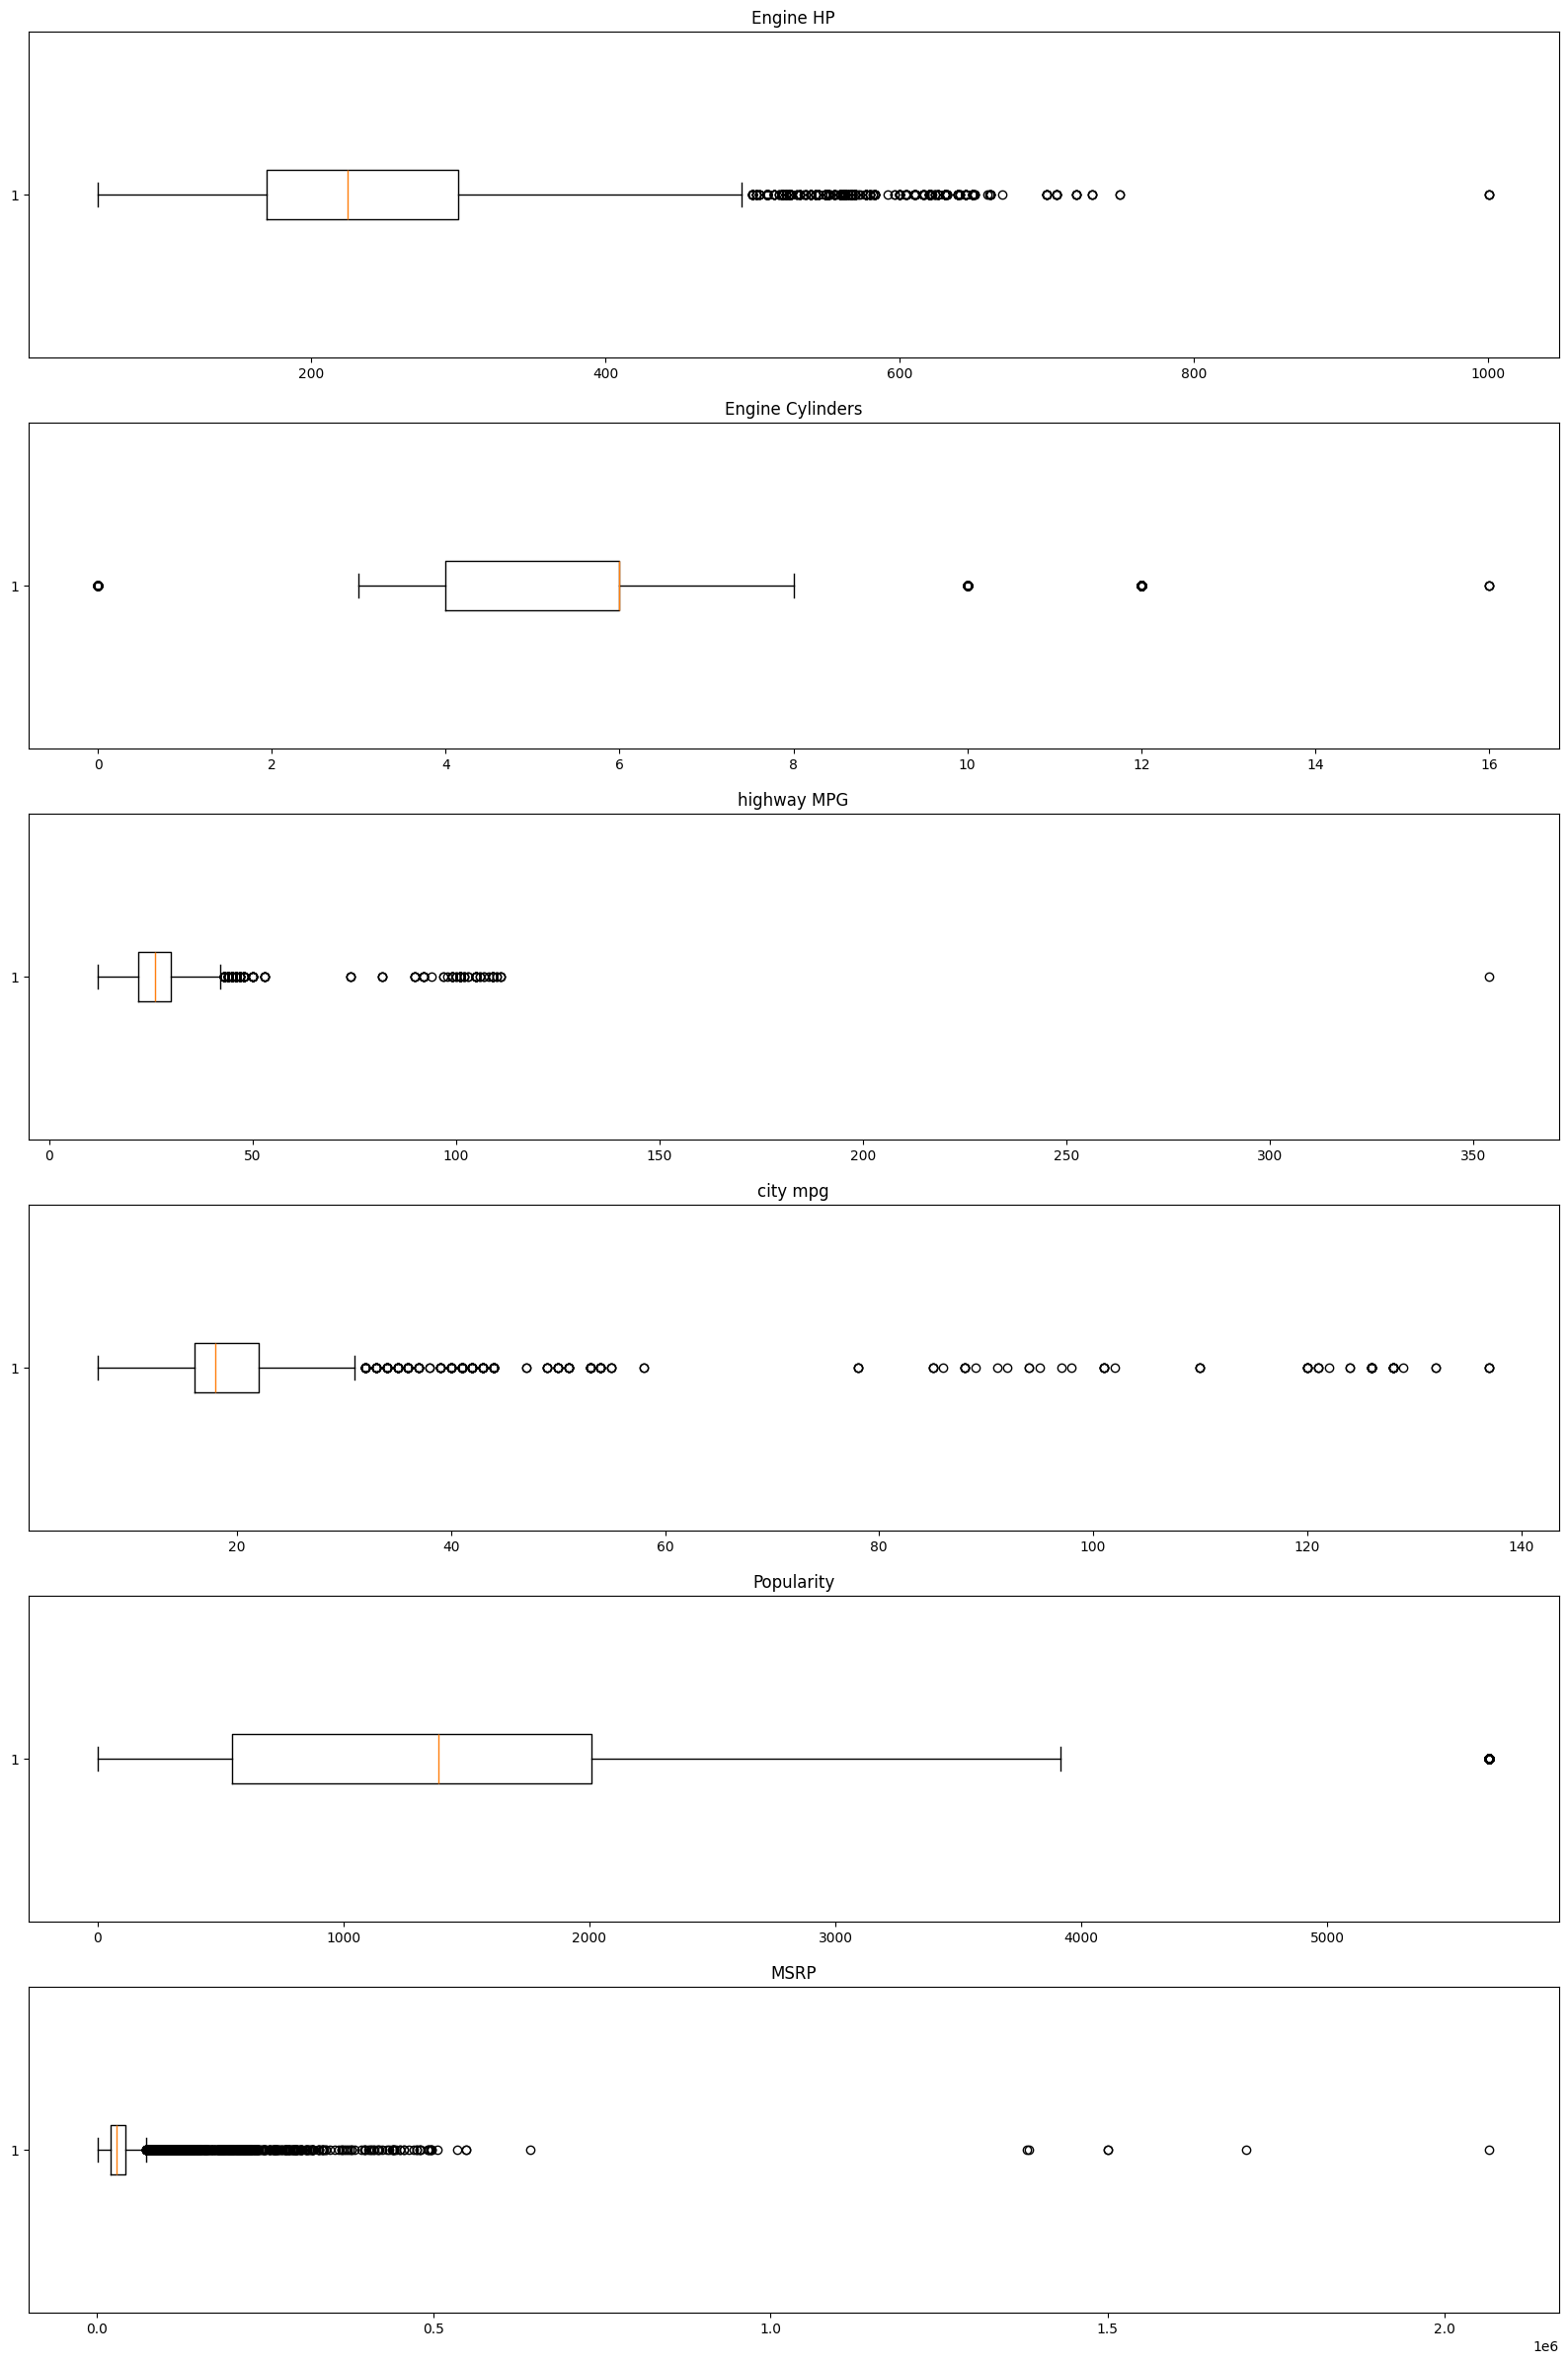

In [12]:
plt.figure(figsize=(20,30))

i=1
for col in features:
    plt.subplot( 6, 1, i)
    plt.boxplot( data[col], vert=False)
    plt.title(col)
    i+=1

plt.show()

In [13]:
data.shape

(11914, 16)

In [14]:
for col in features:
    q1, q3 = np.percentile( data[col], [25,75])
    iqr = q3-q1

    lower = q1-(iqr*1.5)
    upper = q3+(iqr*1.5)

    data = data[(data[col]<upper) & (data[col]>lower)]
data.shape

(9571, 16)

In [15]:
for col in features:
    z_scores = (data[col]-data[col].mean())/data[col].std()
    data = data[ abs(z_scores)<3 ]
data.shape

(9306, 16)

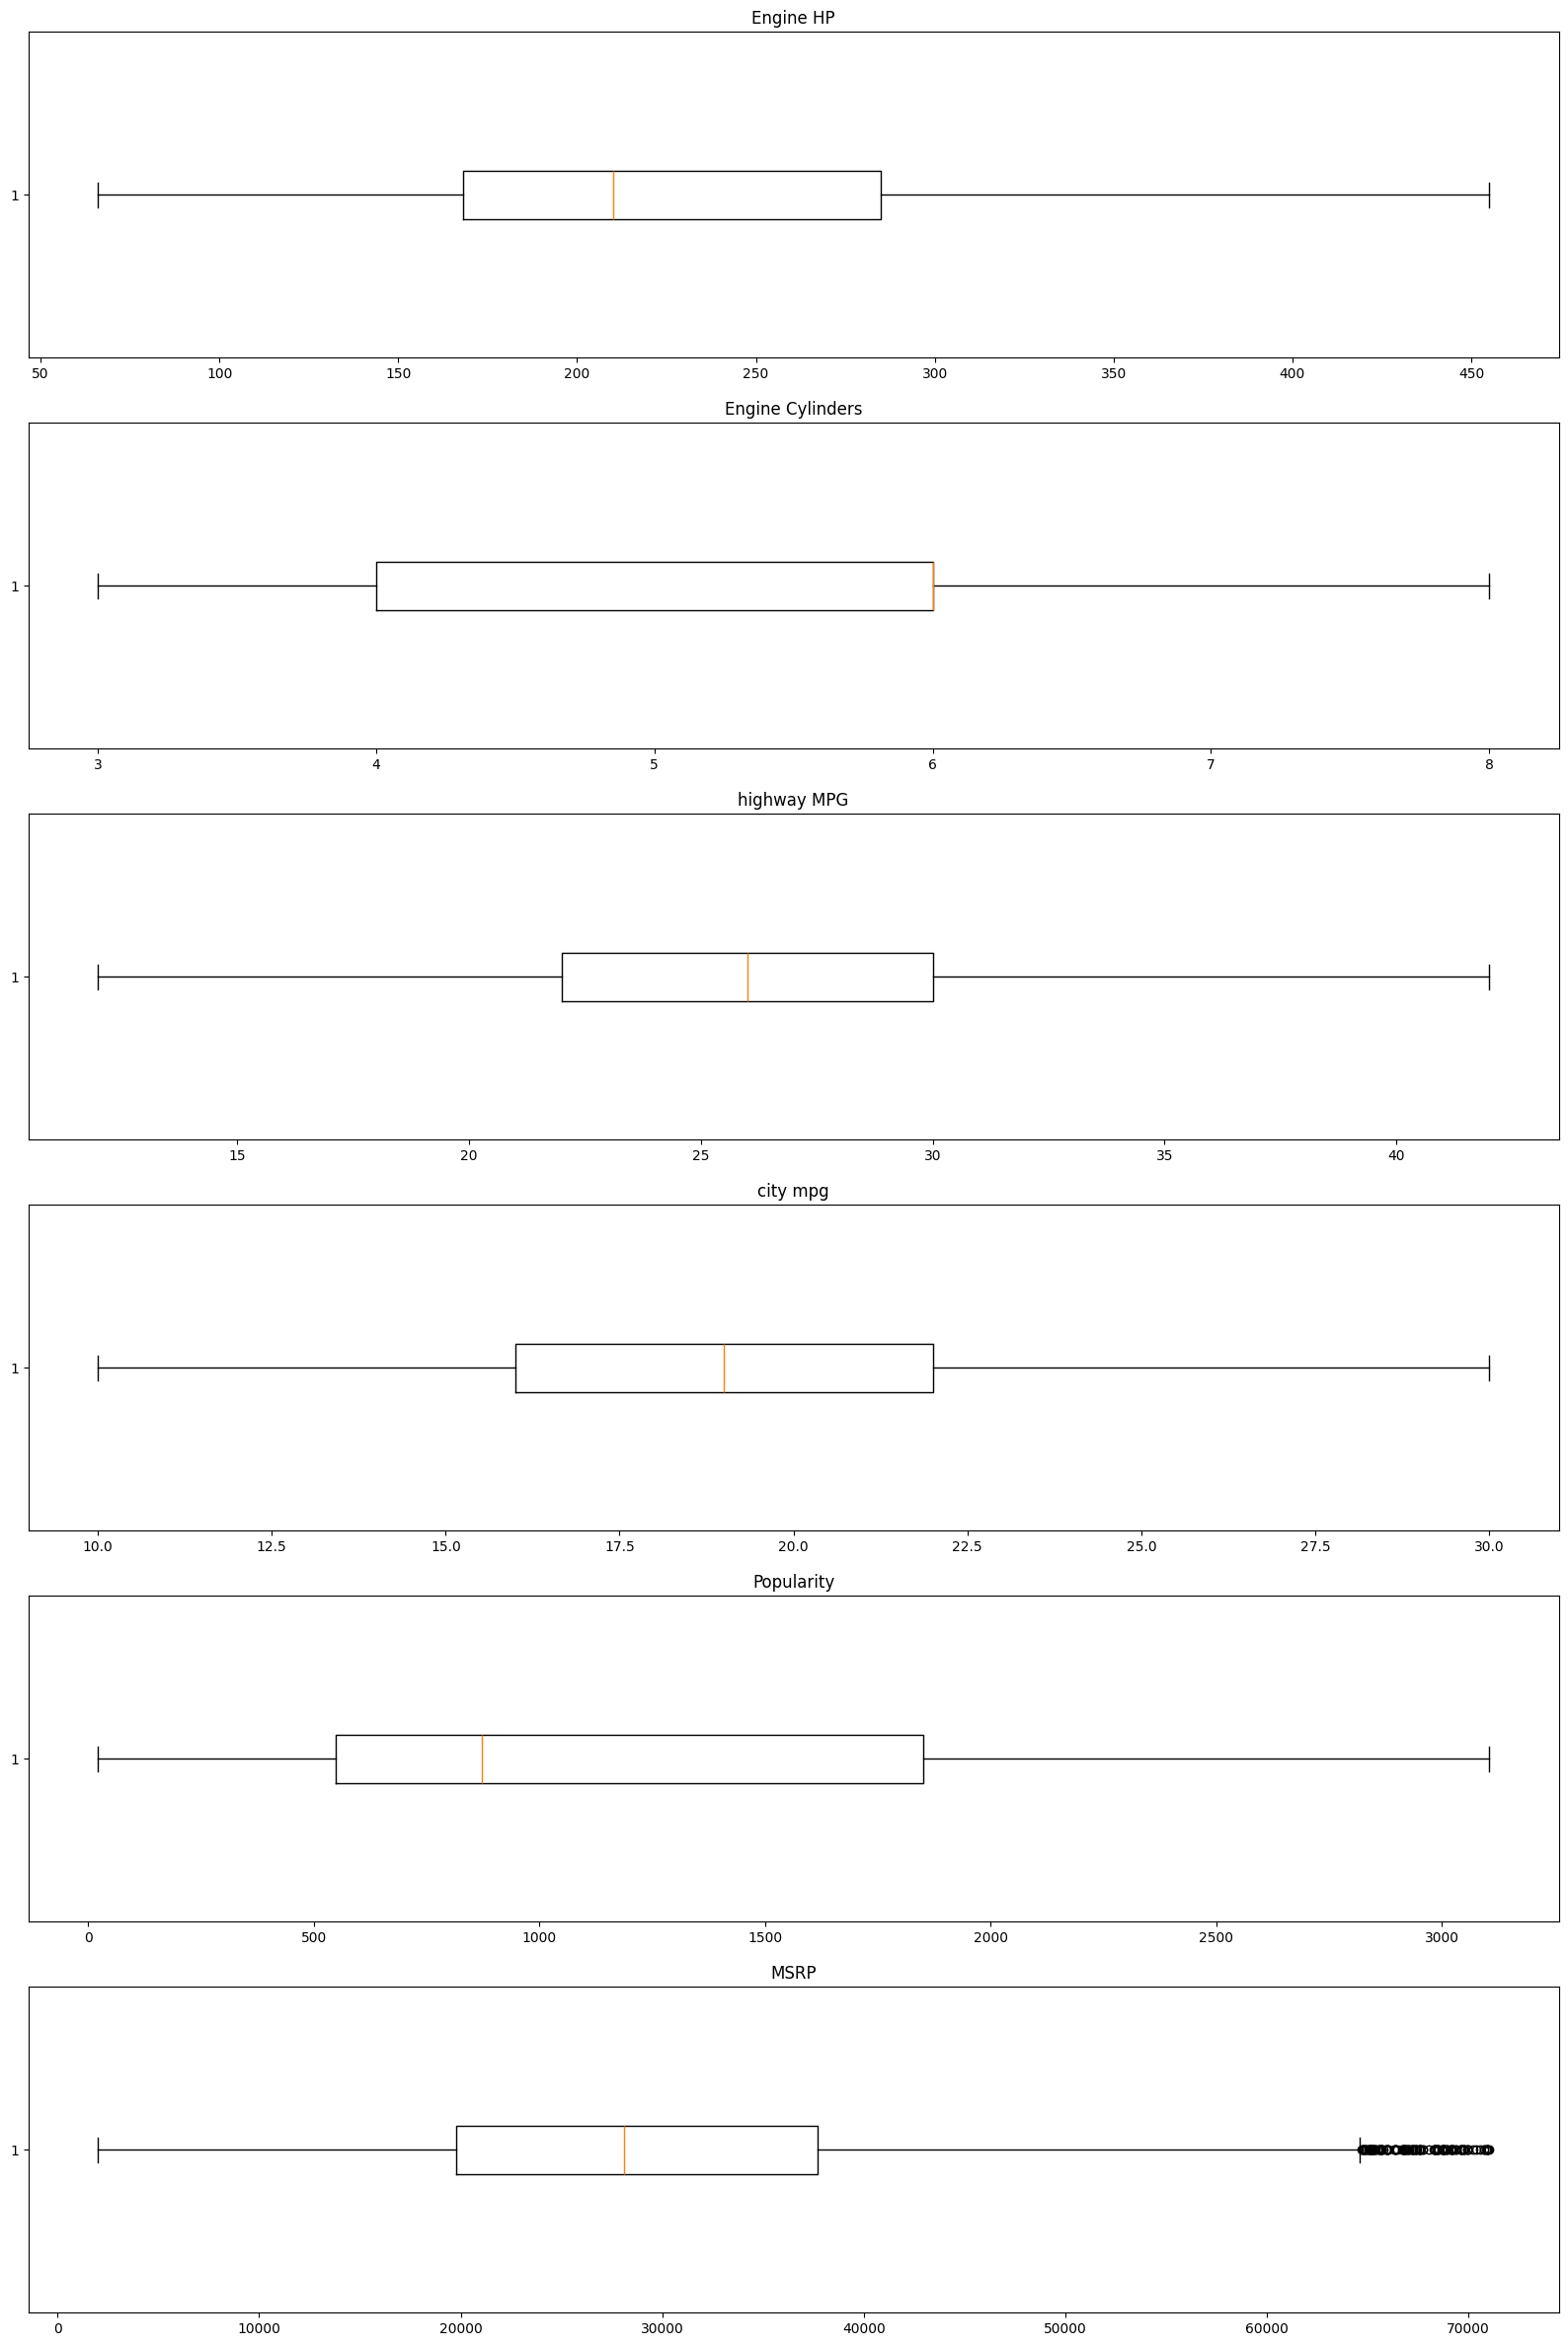

In [16]:
plt.figure(figsize=(20,30))

i=1
for col in features:
    plt.subplot( 6, 1, i)
    plt.boxplot( data[col], vert=False)
    plt.title(col)
    i+=1 

plt.show()

## Numerical Analysis

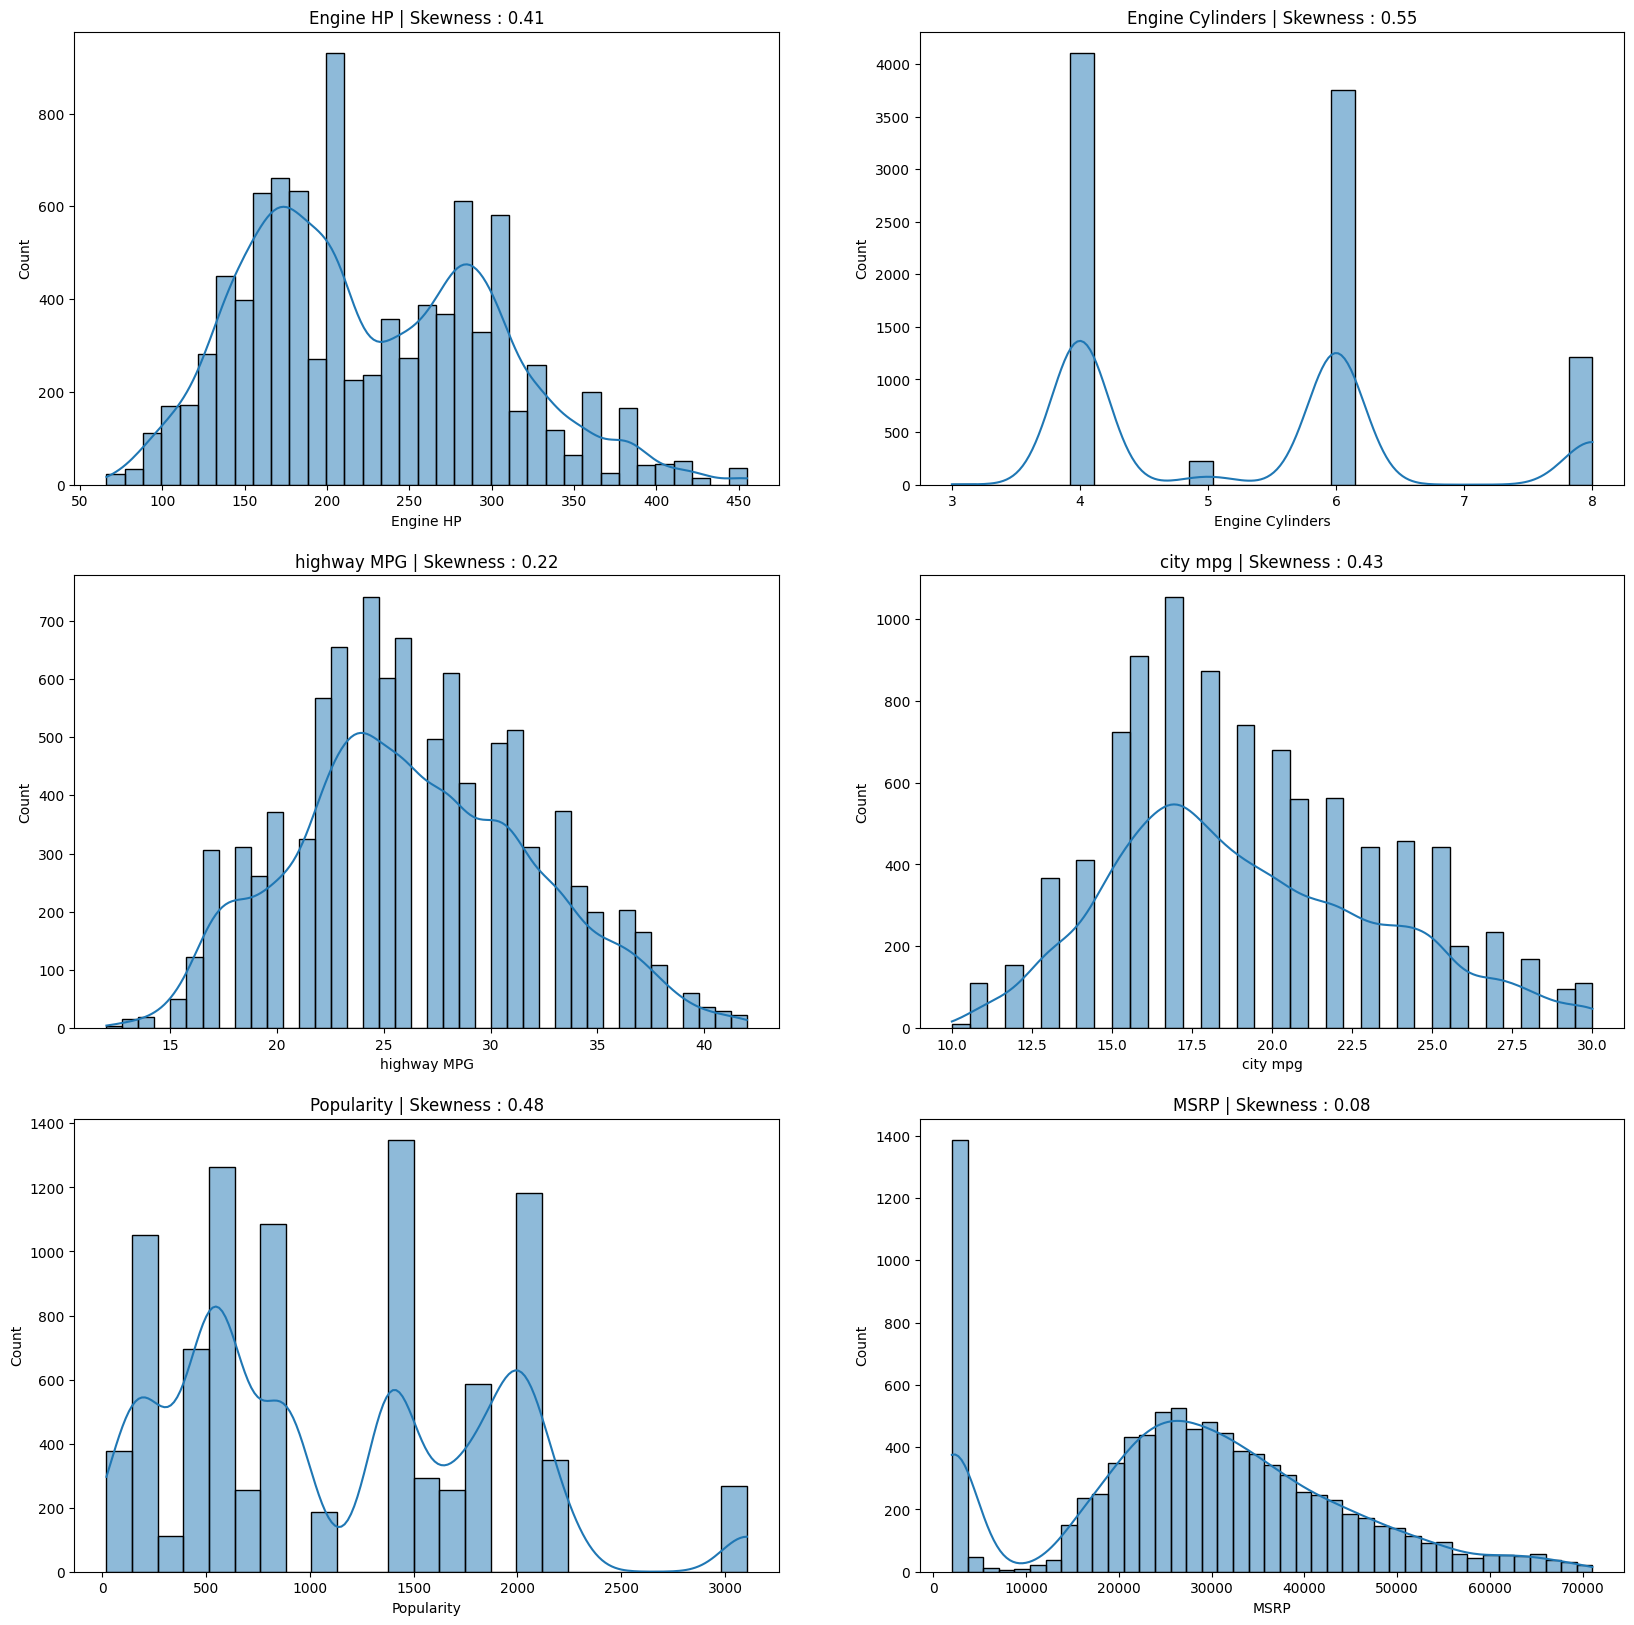

In [17]:
plt.figure(figsize=(20,20))

i=1
for col in features:
    plt.subplot( 3, 2, i)
    sns.histplot( data[col], kde=True)
    plt.title(f'{col} | Skewness : {round( data[col].skew(), 2)}')
    i+=1

plt.show()

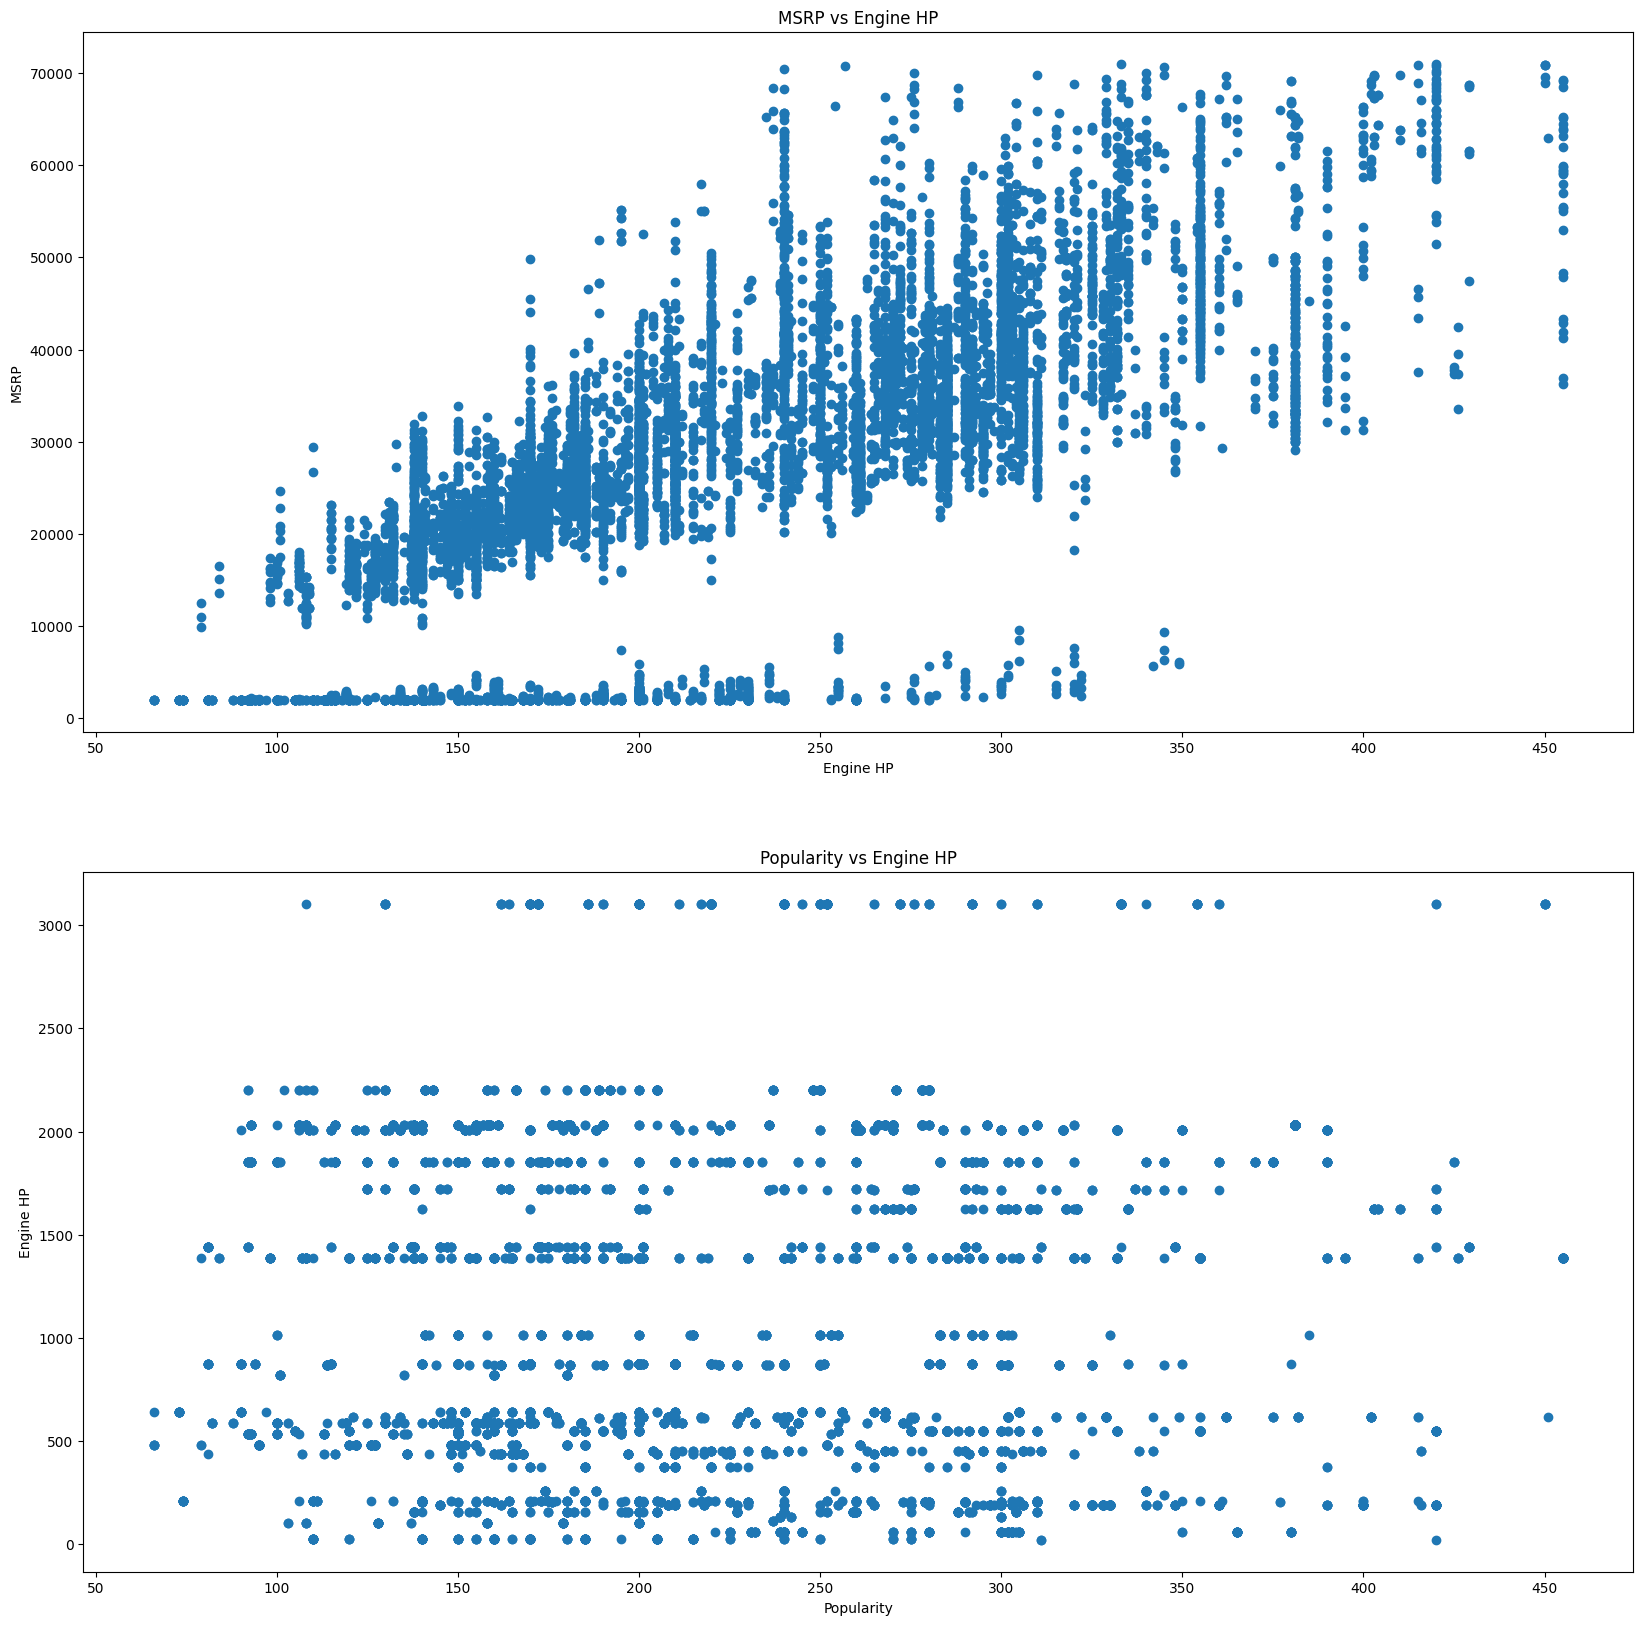

In [18]:
plt.figure(figsize=(20,20))

plt.subplot( 2, 1, 1)
plt.scatter( data[features[0]], data[features[5]])
plt.title(f'{features[5]} vs {features[0]}')
plt.xlabel(features[0])
plt.ylabel(features[5])

plt.subplot( 2, 1, 2)
plt.scatter( data[features[0]], data[features[4]])
plt.title(f'{features[4]} vs {features[0]}')
plt.xlabel(features[4])
plt.ylabel(features[0])

plt.show()

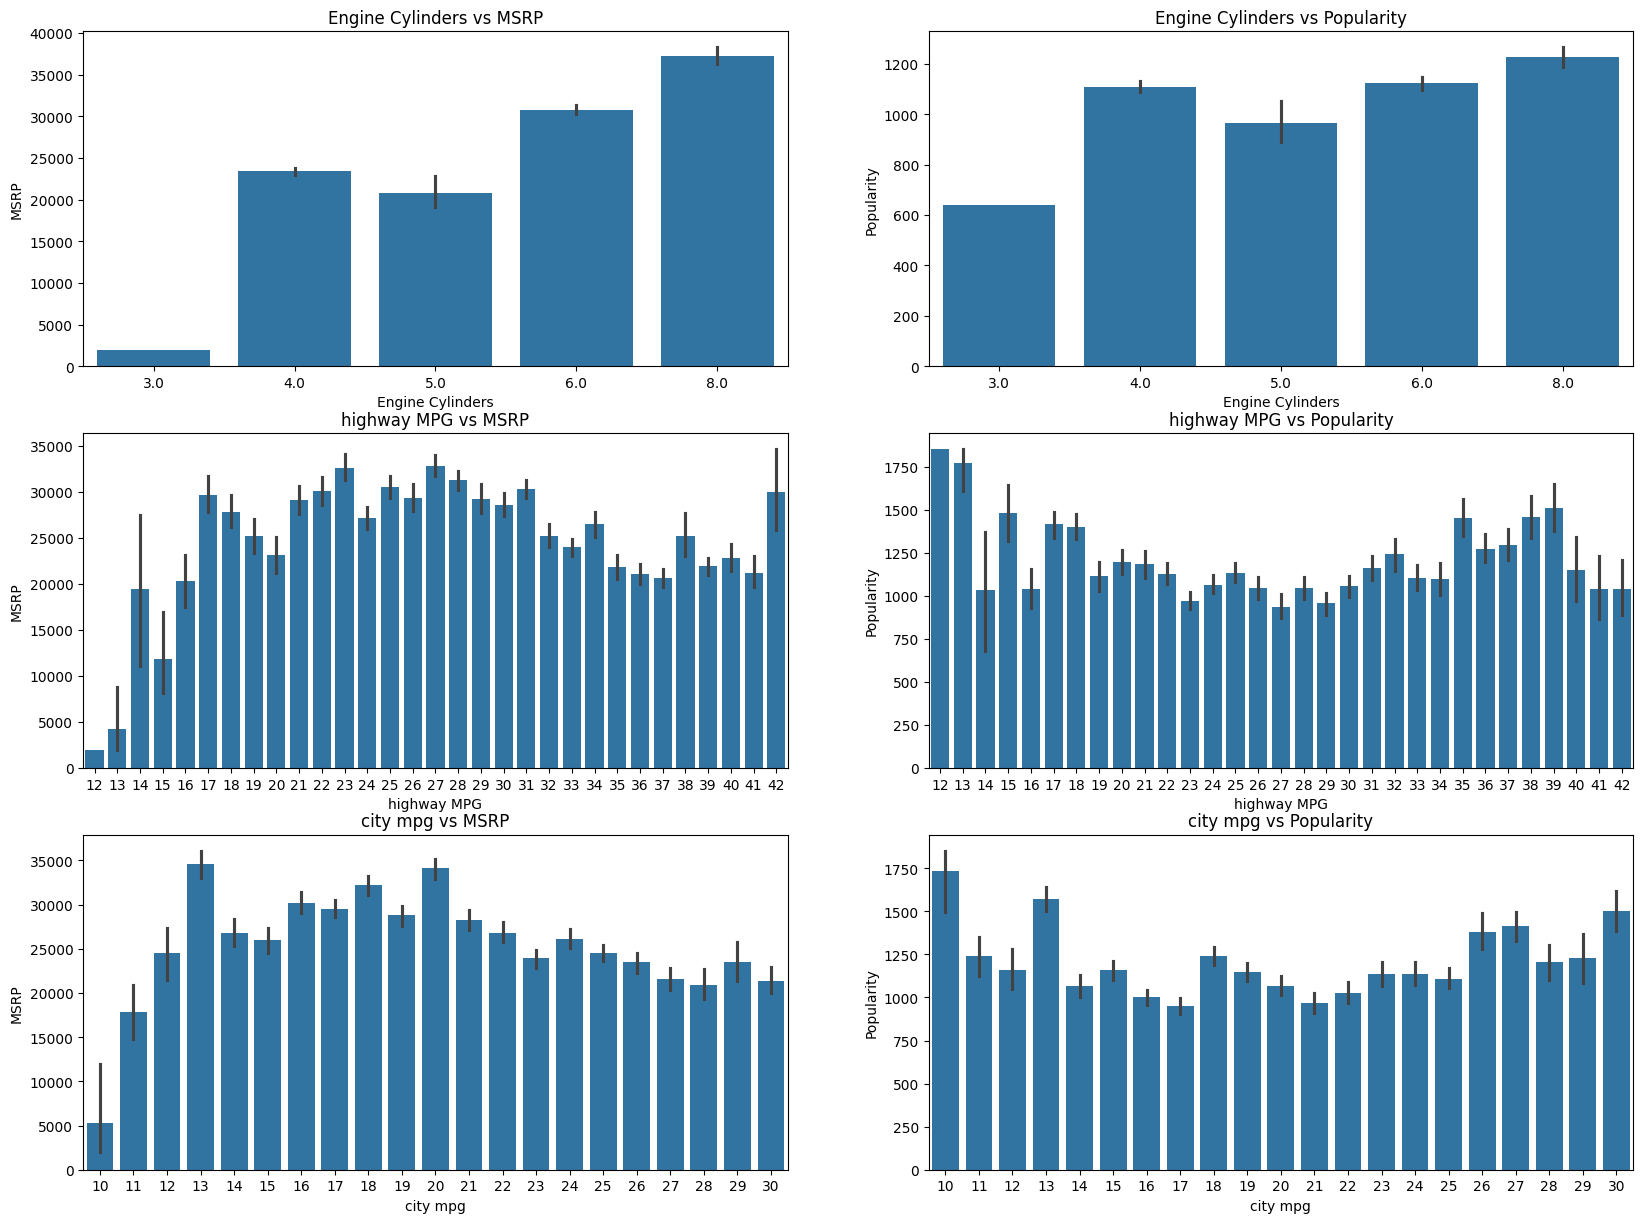

In [19]:
plt.figure(figsize=(20,20))

for i in range(1,4):
    plt.subplot( 4, 2, i*2-1)
    sns.barplot( x=features[i], y=features[5], data=data[features])
    plt.title(f'{features[i]} vs {features[5]}')
    
    plt.subplot( 4, 2, i*2)
    sns.barplot( x=features[i], y=features[4], data=data[features])
    plt.title(f'{features[i]} vs {features[4]}')
    i+=1

plt.show()

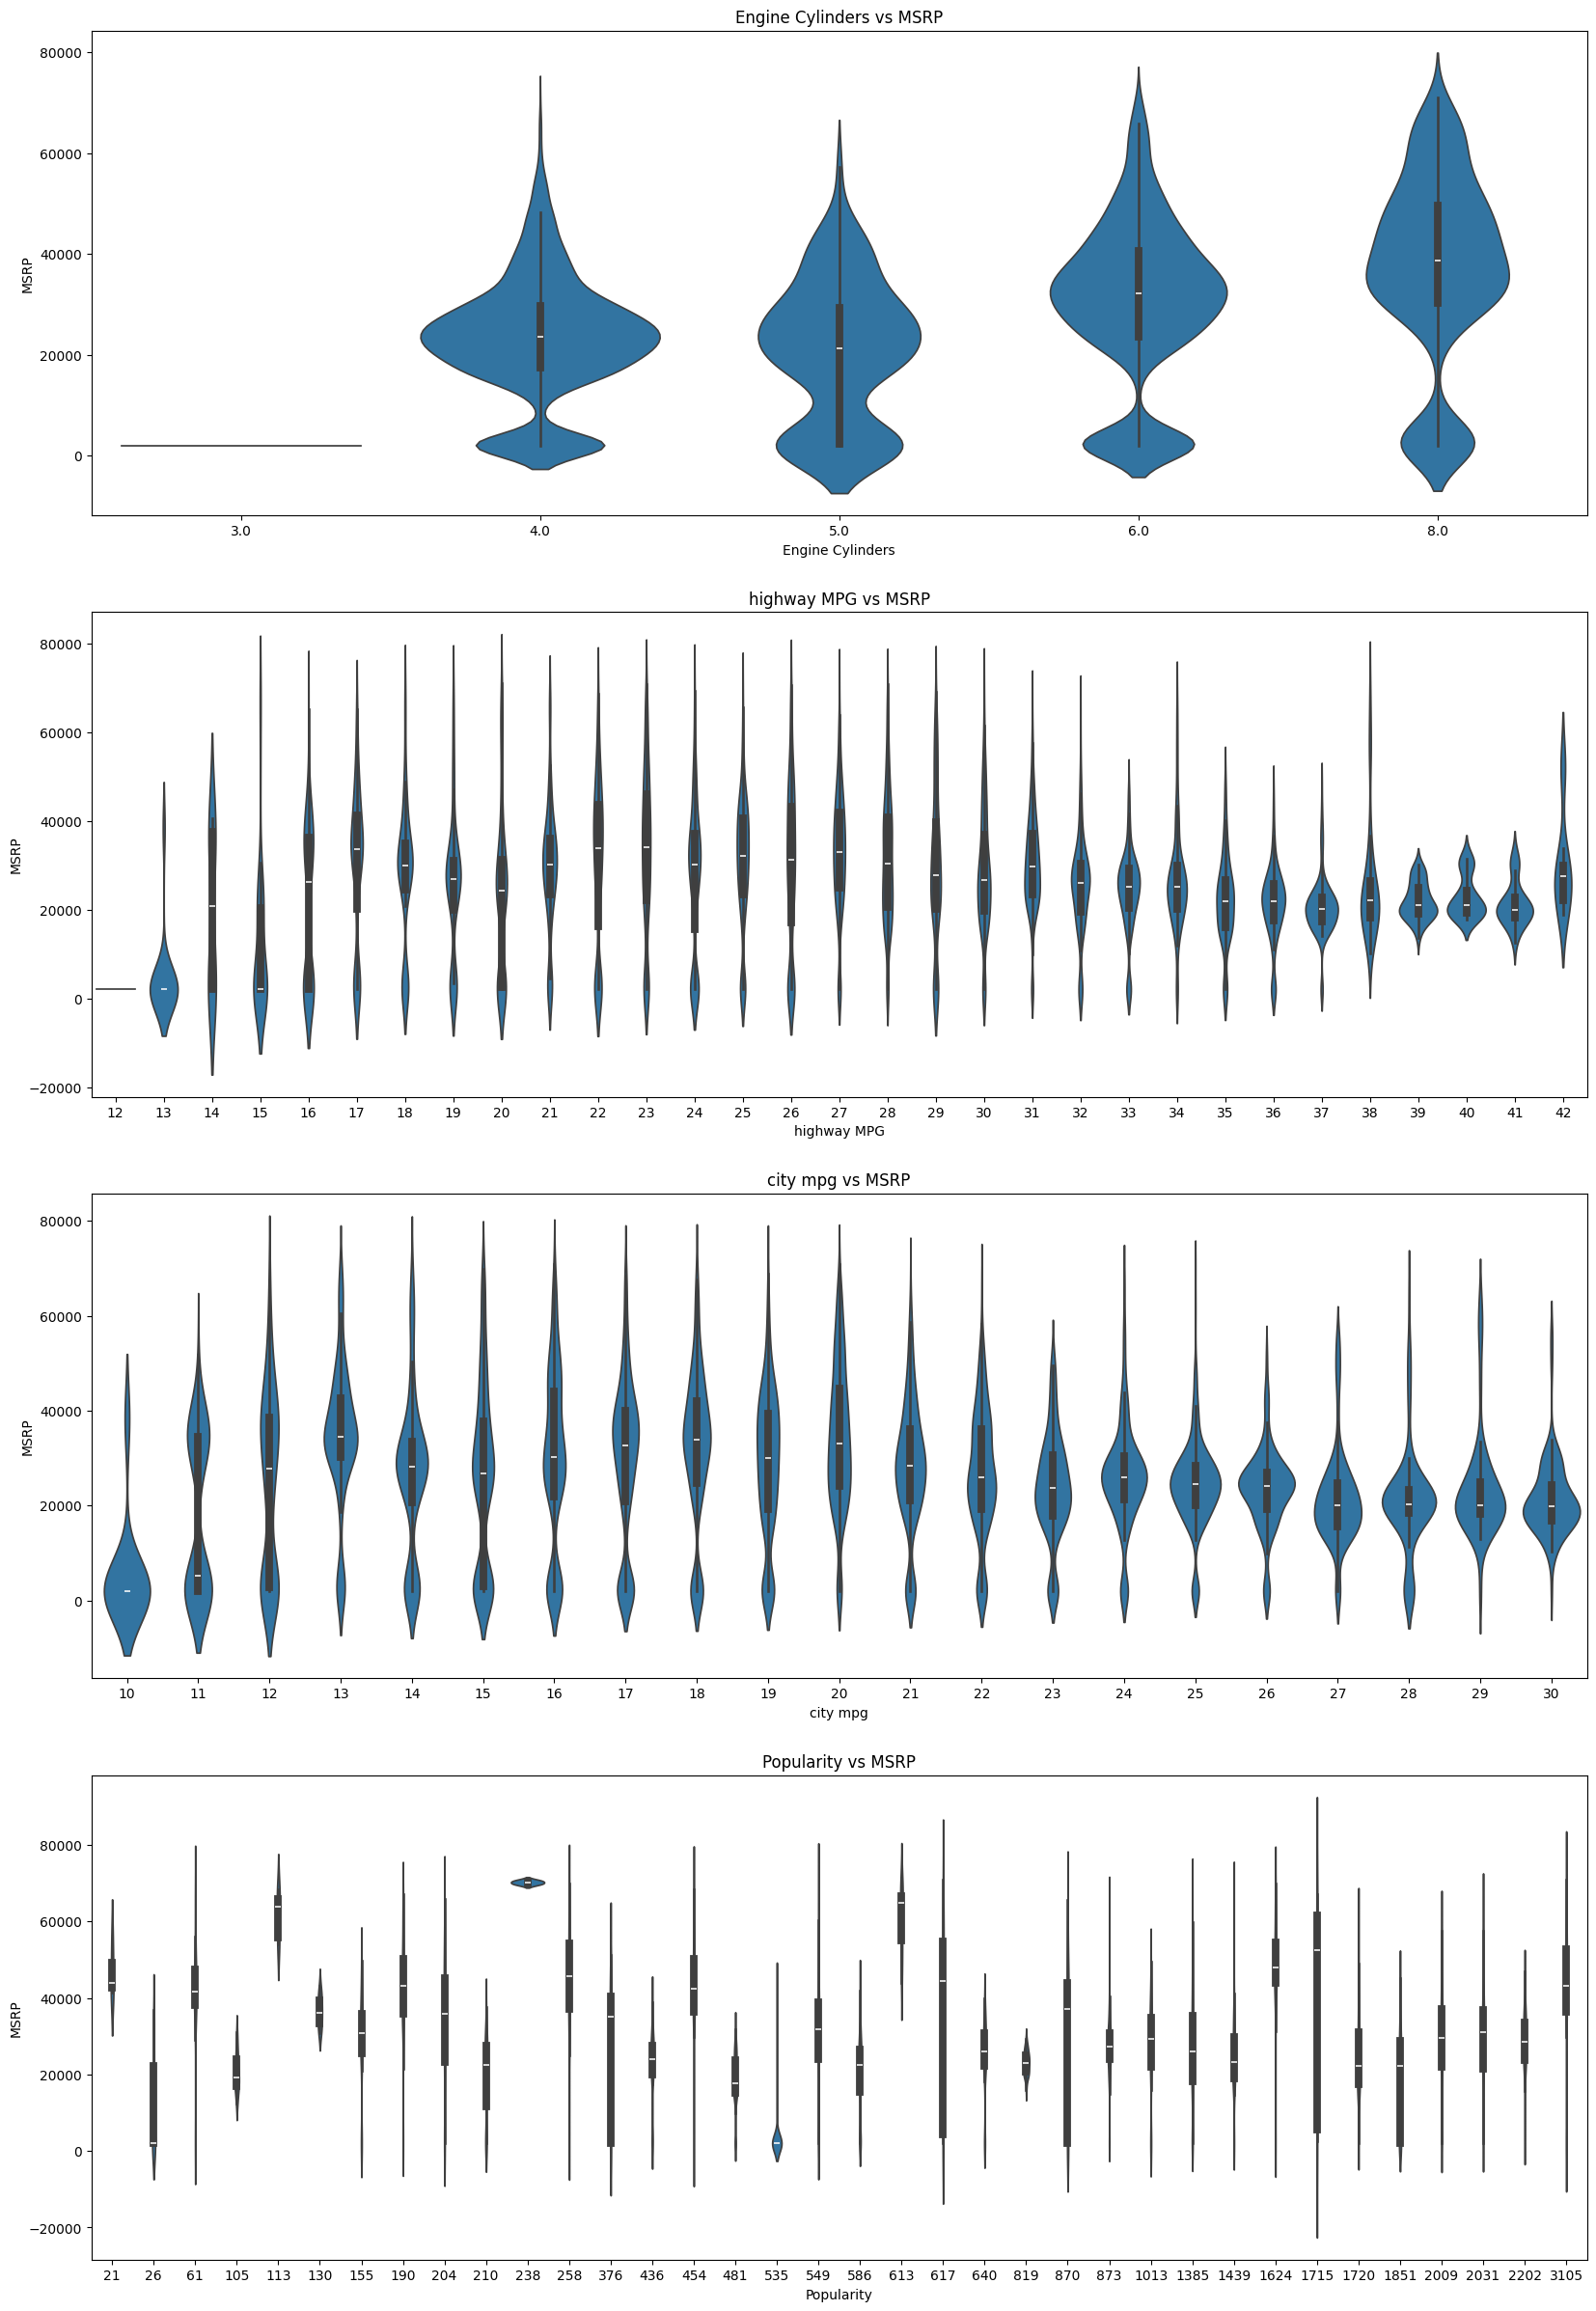

In [20]:
plt.figure(figsize=(20,30))

for i in range(1,5):
    plt.subplot( 4, 1, i)
    sns.violinplot( x=data[features[i]], y=data[features[5]])
    plt.title(f'{features[i]} vs {features[5]}')
    i+=1

plt.show()

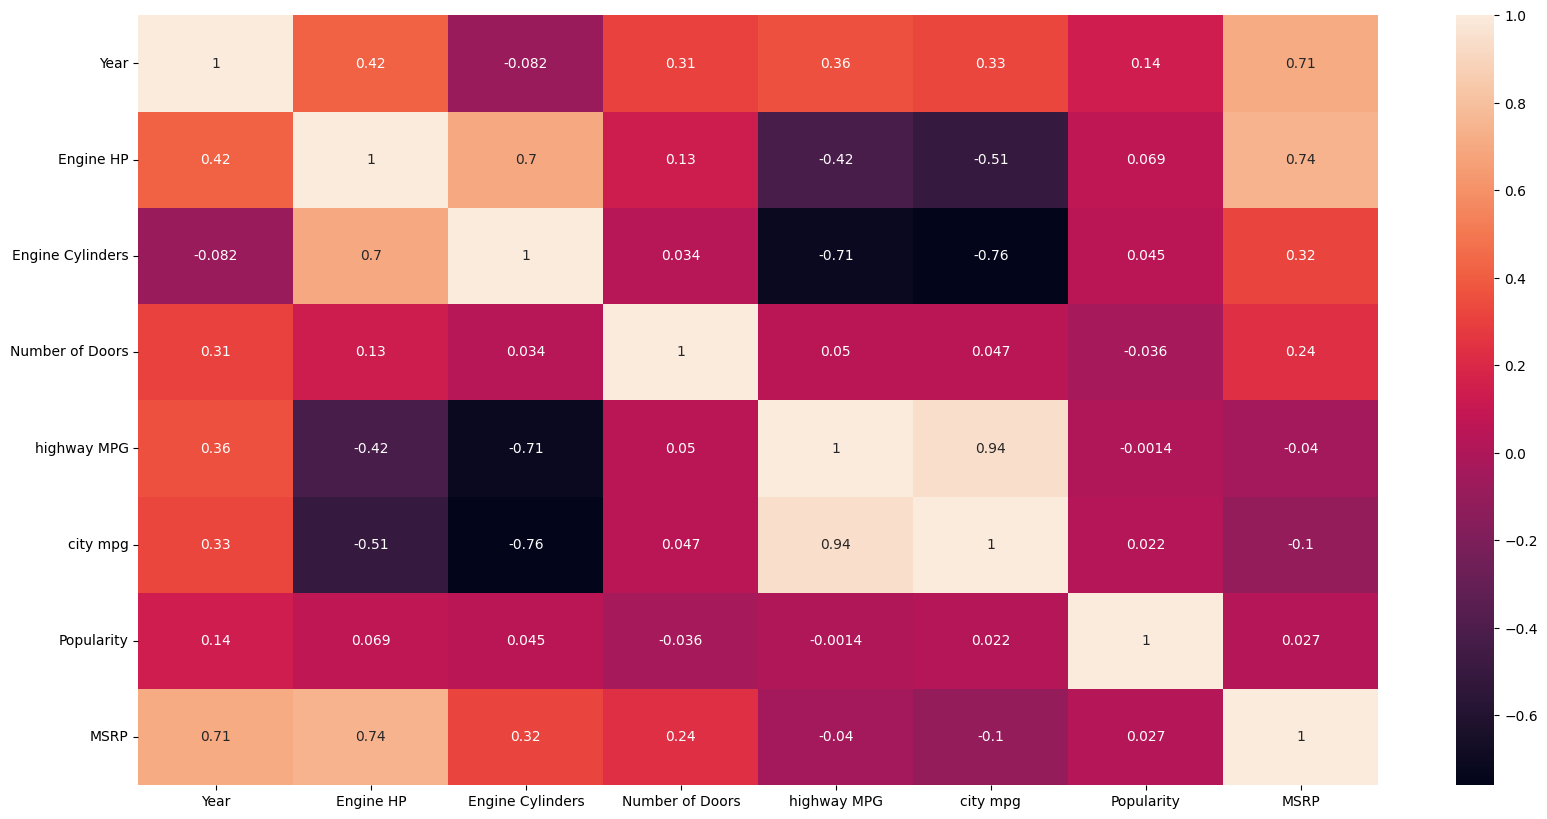

In [21]:
plt.figure( figsize=(20,10))
sns.heatmap( data.select_dtypes(include=['int64','float64']).corr(), annot=True )
plt.show()

# Categorical Analysis

In [22]:
categories = data.select_dtypes(include=['object']).columns
categories = categories.drop(['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style']).to_list()
categories

['Make', 'Model', 'Market Category']

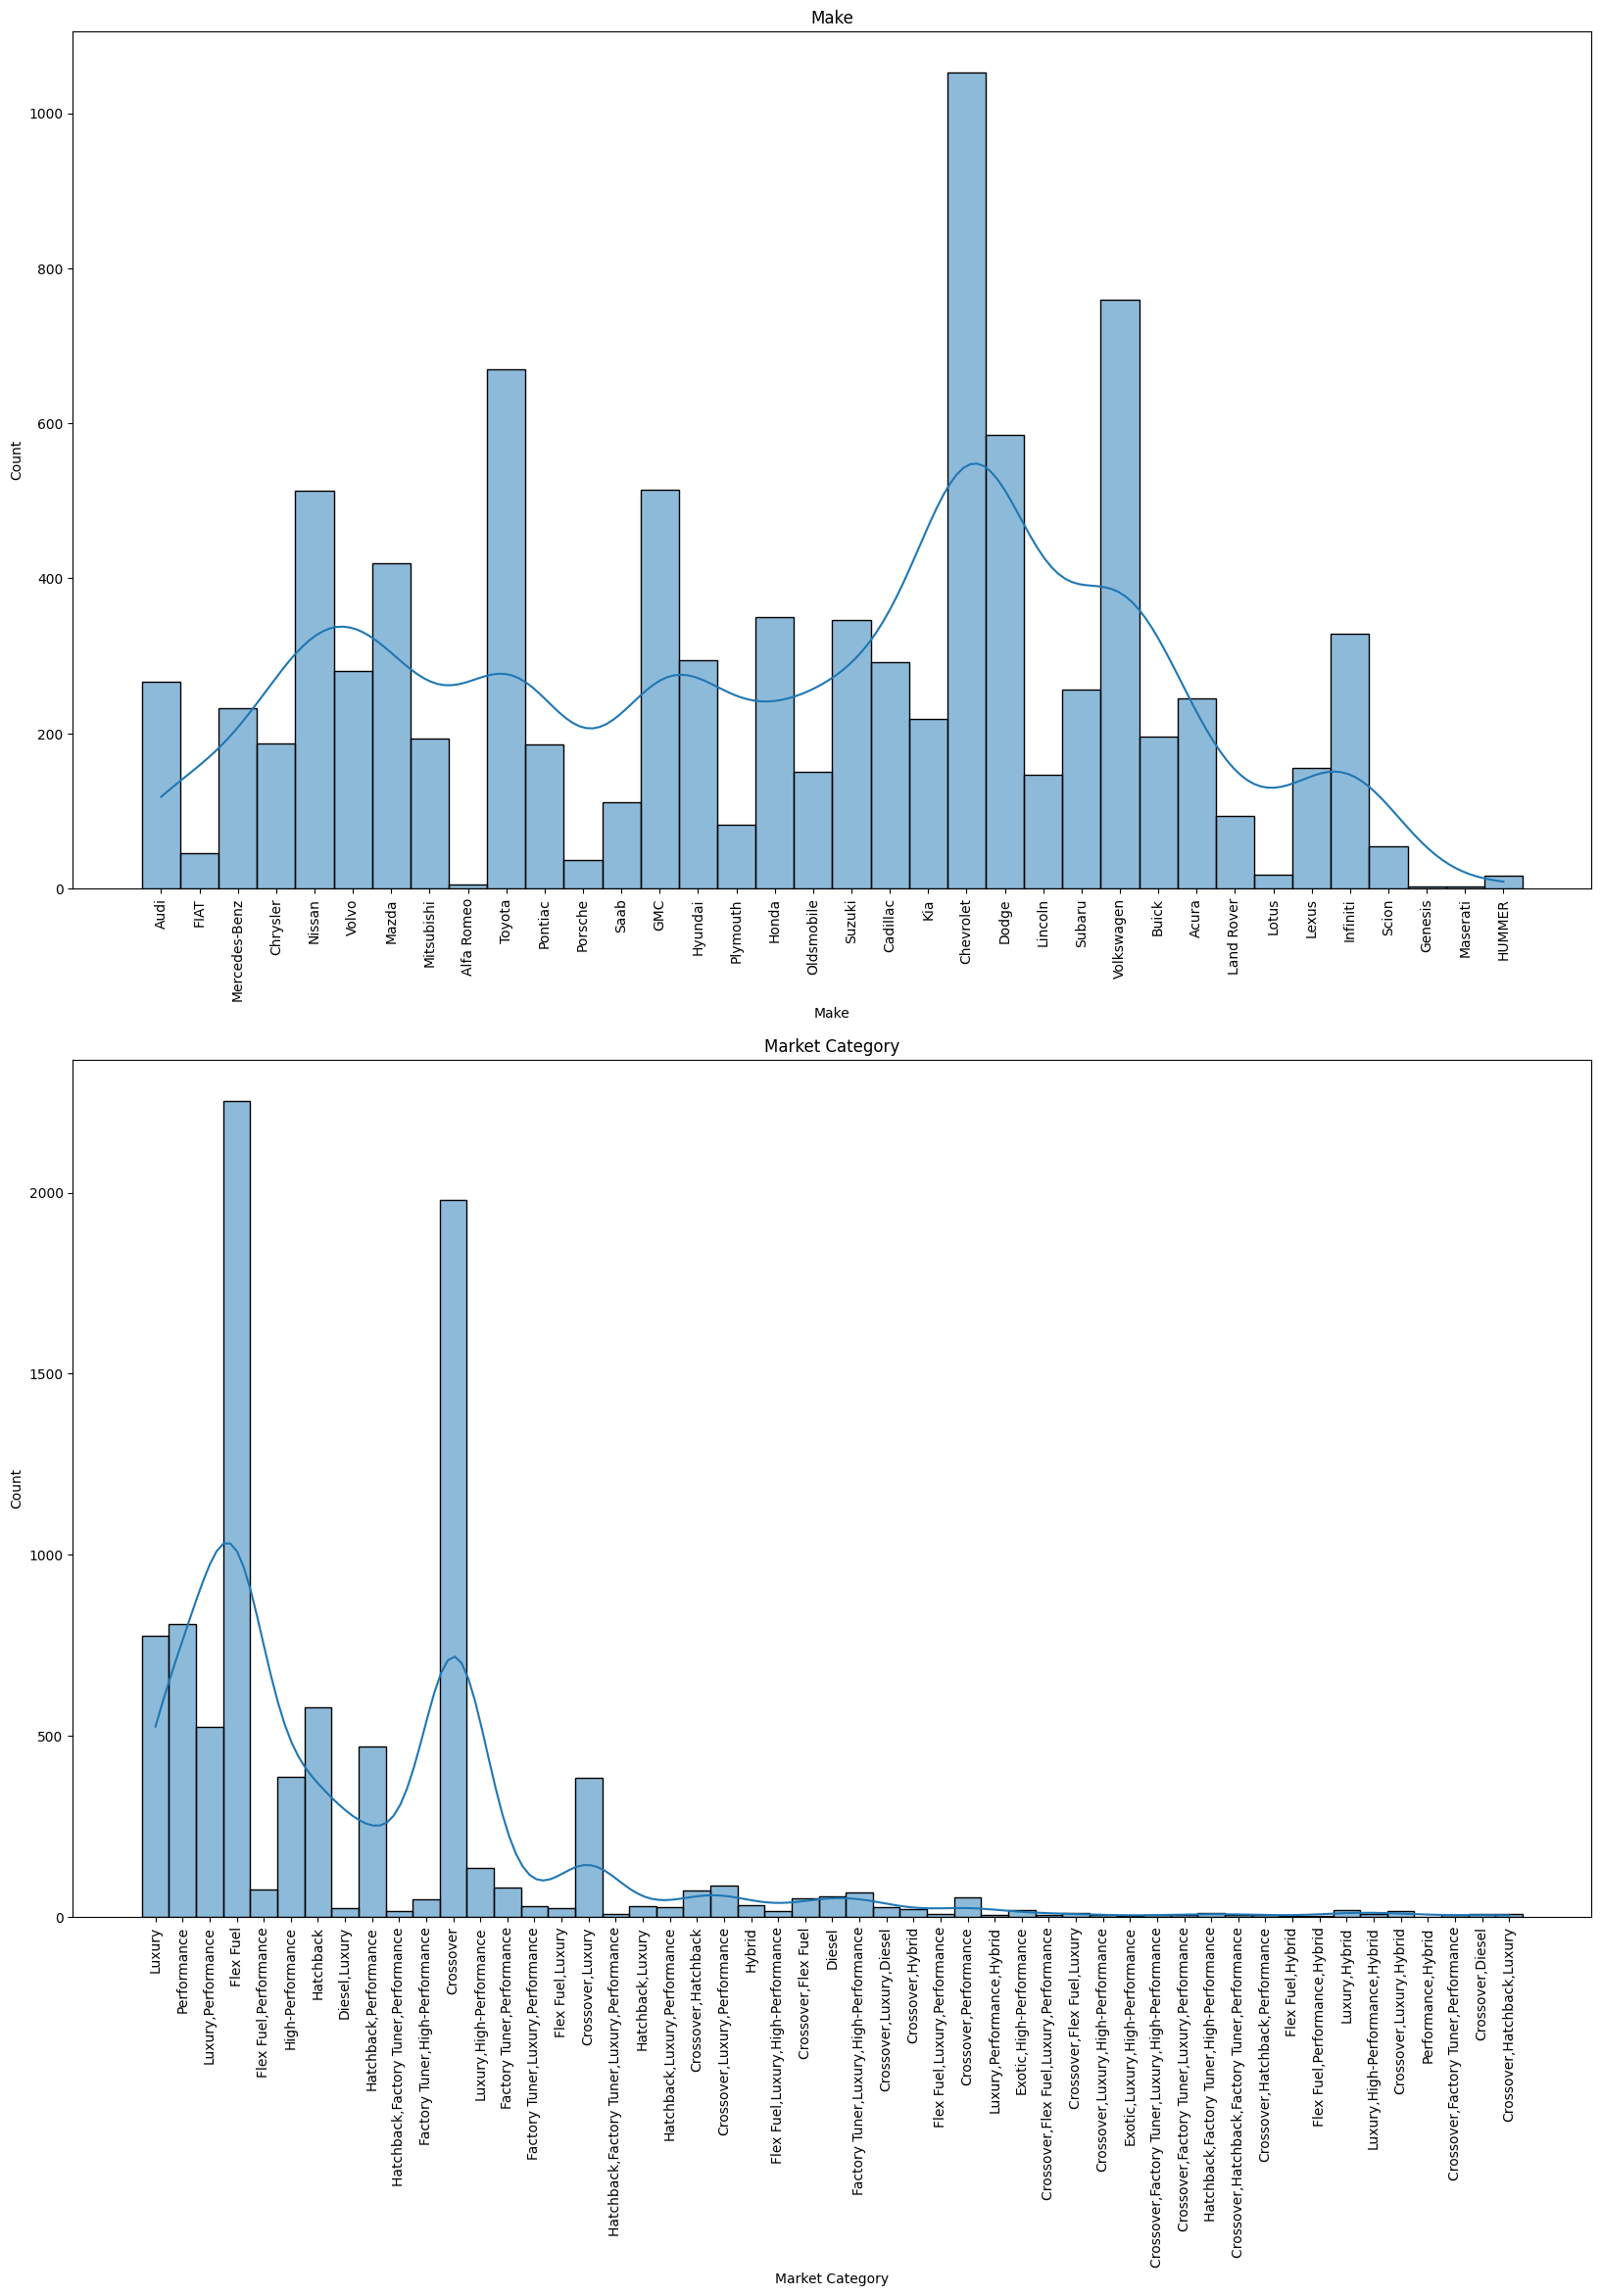

In [23]:
plt.figure(figsize=(20,25))

plt.subplot( 2, 1, 1)
sns.histplot(data[categories[0]], kde=True)

plt.title(categories[0])
plt.xticks(rotation='vertical')


plt.subplot( 2, 1, 2)
sns.histplot(data[categories[2]], kde=True)

plt.title(categories[2])
plt.xticks(rotation='vertical')

plt.show()

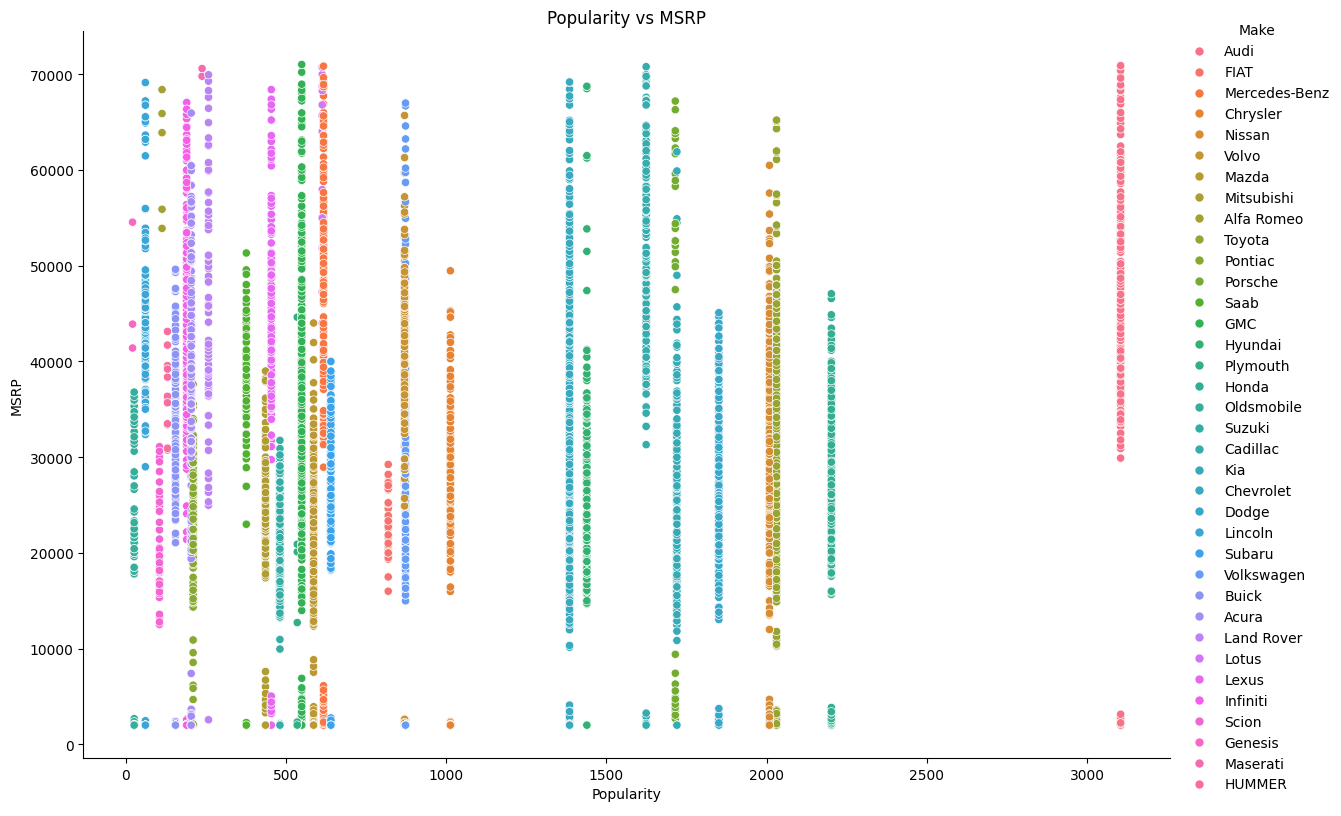

In [24]:
sns.relplot( x=features[4], y=features[5], data=data, hue=categories[0], height=8, aspect=1.5)
plt.title( f'{features[4]} vs {features[5]}' )

plt.show()

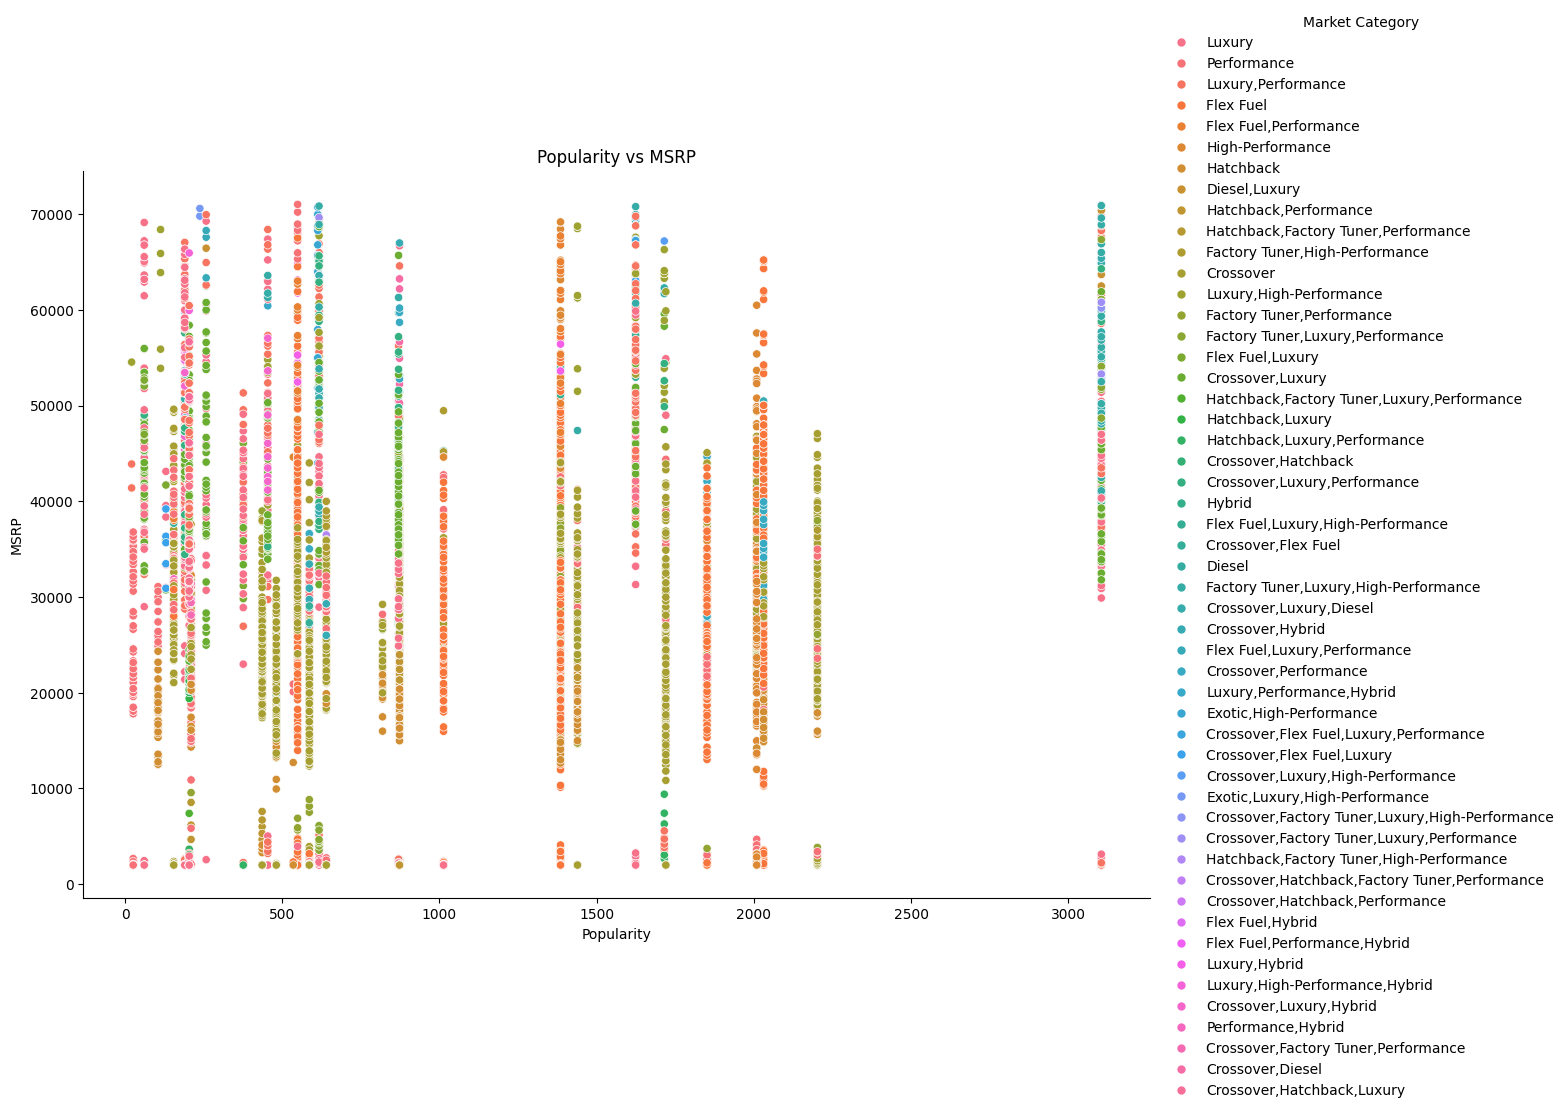

In [25]:
sns.relplot( x=features[4], y=features[5], data=data, hue=categories[2], height=8, aspect=1.5)
plt.title( f'{features[4]} vs {features[5]}' )

plt.show()